In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
f = lambda x,y: x**2+y**2-2*x-5*y+(29/4)

In [3]:
# G,A,c,b
G = np.array([[2.,0],[0,2]])
c = np.array([-2.,-5])
A = np.array([[1.,-2],[-1,-2],[-1,2]])
b = np.array([-2.,-6,-2])

In [4]:
# initialization for x,y,lambda,e
x0 = np.array([0.5,0.5])      # initial x0
y0 = np.array([0.5,0.5, 0.5])
lamb0 = np.array([0.5,0.5, 0.5])
e = np.array([1.,1,1])

In [5]:
# setting loop, stop when exceeds max iteration or less than tolerance
tol = 1e-4                    # tolerance
Max_itr = 50                  # max iteration
itr = 0

x = x0
y = y0
lamb = lamb0

tau = 0.5                     # setting tau
sig = 0.5                    # setting sigma
mu = y0@lamb0/3

# recording the path
pathx = [x0[0]]               
pathy = [x0[1]]

while mu>tol and itr<Max_itr:
    # compute rd, rp, and set up Y and Lambda
    rd = G@x-A.T@lamb+c
    rp = A@x-y-b
    Y = np.diag(y)
    L = np.diag(lamb)
        
    # computing dx,dy and dlamb
    lhs = G+A.T@np.diag(1/y)@L@A
    rhs = -rd+A.T@np.diag(1/y)@L@(-y+sig*mu*np.diag(1/lamb)@e-rp)
    dx = np.linalg.solve(lhs,rhs)
    dy = A@dx+rp
    dlamb = np.diag(lamb/y)@(-Y@e+sig*mu*np.diag(1/lamb)@e-rp-A@dx)
        
    # computing alpha
    # tau*y+a*dy=0  => a=-(tau*y/dy) & a>0
    alpha_pr = min([t for t in -tau*y/dy if t>0]) if len([t for t in dy if t<0])>0 else 1
    alpha_du = min([t for t in -tau*lamb/dlamb if t>0]) if len([t for t in dlamb if t<0])>0 else 1
    alpha = min(alpha_pr,alpha_du,1)
        
    # updating
    x += alpha*dx
    y += alpha*dy
    lamb += alpha*dlamb
    
    mu = y@lamb/3
    itr += 1
        
    # recording the path
    pathx.append(x[0])
    pathy.append(x[1])
    
    print('Iteration: ',itr)
    print('dx: ',dx,'dy: ',dy,'dlambda: ',dlamb)
    print('alpha: ',alpha)
    print('x: ',x,'y: ',y,'lambda: ',lamb)
    print('')

print(x)
print(f(x[0],x[1]))

Iteration:  1
dx:  [1.50757576 0.89393939] dy:  [0.71969697 0.70454545 2.28030303] dlambda:  [-0.96969697 -0.95454545 -2.53030303]
alpha:  0.09880239520958084
x:  [0.6489521  0.58832335] y:  [0.57110778 0.56961078 0.7252994 ] lambda:  [0.40419162 0.40568862 0.25      ]

Iteration:  2
dx:  [1.00866751 1.01796758] dy:  [-0.12607005  0.56018775  2.82966286] dlambda:  [-0.1272488  -0.61645369 -1.07753133]
alpha:  0.11600590815585123
x:  [0.76596349 0.70641361] y:  [0.55648291 0.63459587 1.05355701] lambda:  [0.38943    0.33417635 0.125     ]

Iteration:  3
dx:  [0.69153596 1.03399494] dy:  [-0.57980055  0.4270876   2.96976063] dlambda:  [ 0.18417943 -0.41188007 -0.38868574]
alpha:  0.16079828333958782
x:  [0.87716128 0.87267822] y:  [0.46325198 0.70327082 1.53108942] lambda:  [0.41904574 0.26794674 0.0625    ]

Iteration:  4
dx:  [0.51925355 0.89139813] dy:  [-0.59498985  0.37216165  2.60064845] dlambda:  [ 0.2912314  -0.29639975 -0.11659952]
alpha:  0.26801140323732325
x:  [1.01632715 1.1

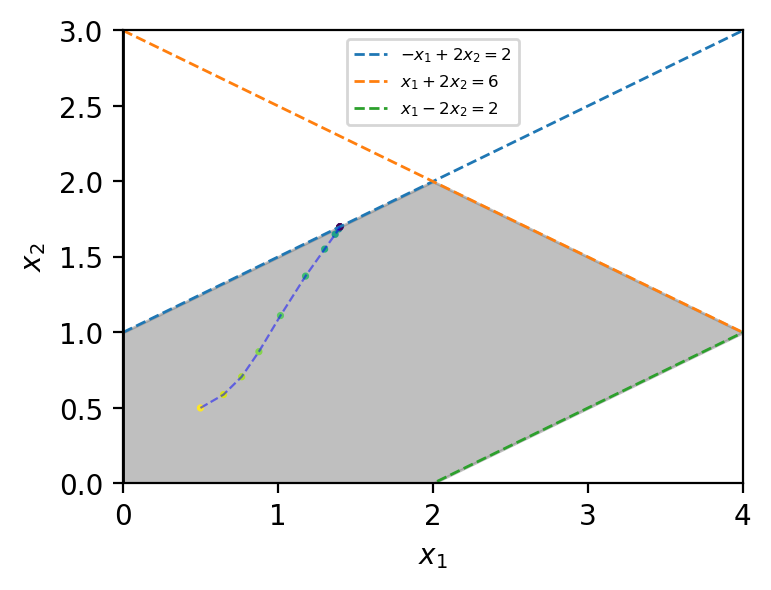

In [57]:
# plotting the region with iteration path
x1 = np.linspace(0,4,200)
# x2 = np.linspace(-1,4,50)
y1 = (x1+2)/2
y2 = (6- x1)/2
y3 = (x1-2)/2
plt.figure(figsize=(4,3),dpi=200) 
plt.xlim([0,4])
plt.ylim([0,3])
plt.plot(x1,y1,x1,y2,x1,y3,linewidth=1,linestyle='--')
plt.plot(x1,x1*0,'k',x1*0,x1,'k',linewidth=1,linestyle='-')
bound = np.min(np.array([y1,y2]),axis=0)
plt.fill_between(x1, bound, y3, color='grey', alpha=0.5)
plt.legend([f'$-x_1+2x_2=2$',f'$x_1+2x_2=6$',f'$x_1-2x_2=2$'],fontsize=6)
plt.xlabel(f'$x_1$')
plt.ylabel(f'$x_2$')
cValue = -np.linspace(0,1,len(pathx))
plt.plot(pathx,pathy, linewidth=0.8, c='b', alpha=0.5, linestyle='--')
plt.scatter(pathx,pathy,c = cValue,alpha=1, s=10 ,marker='.' )
plt.show()

## Comments

According to the code, the minimum is $0.80$ at $(x,y)=(1.399,1.699)=(1.4,1.7)$.The path is illustrated in the previous cell.